# Linear Regression

## Install `statsmodels` and `linearmodels` packages.

In [ ]:
!pip install statsmodels

!pip install linearmodels

!pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download the data and read the file.

In [6]:
import pandas as pd; import numpy as np;
import pyarrow as pa

If you have data on the local drive of your computer, then you can read the data file as follows:

<code>
import os

homedir = "C:/Users/Seon Tae Kim/Documents/Python_work"

os.chdir( f"{homedir}/poe5rdata" )

df = pd.read_csv("nls_panel.csv")
</code>

First, you need to set the working directory, by calling `os.chdir(  )`  function to which you pass the path to the working directory as the argument. To do this, you need to import the `os` pacakge by coding: `import os`

Second, we use the `pandas.read_csv()` function of the `pandas` package, which is already loaded and named as `pd` in the earlier code, to which we pass the file name as the argument.


In [8]:
df = pd.read_csv("http://www.principlesofeconometrics.com/poe5/data/csv/nls_panel.csv")
df

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2
0,1,82,1.808289,38,30,12,0,1,0,0,1,0,1,1,7.666667,58.77777,7.666667,58.777770
1,1,83,1.863417,38,31,12,0,1,0,0,1,0,1,1,8.583333,73.67361,8.583333,73.673610
2,1,85,1.789367,38,33,12,0,0,0,0,1,0,1,1,10.179490,103.62200,1.833333,3.361111
3,1,87,1.846530,40,35,12,0,0,0,0,1,0,1,1,12.179490,148.33990,3.750000,14.062500
4,1,88,1.856449,40,37,12,0,0,0,0,1,0,1,1,13.621790,185.55330,5.250000,27.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.609438,40,36,12,0,1,0,1,0,1,0,0,12.435900,154.65160,3.083333,9.506944
3576,716,83,1.459441,40,37,12,0,1,0,1,0,1,0,0,13.435900,180.52330,4.083333,16.673610
3577,716,85,1.427116,40,39,12,0,1,0,1,0,1,0,0,15.435900,238.26690,6.083333,37.006950
3578,716,87,1.494368,30,41,12,0,1,0,1,0,1,0,0,17.435900,304.01050,8.166667,66.694450


In [9]:
df["lage"] = np.log( df["age"] )

In [10]:
df[  ["lage" , "leduc" ] ] = np.log(  df[ ["age" , "educ" ]  ] )
df

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2,lage,leduc
0,1,82,1.808289,38,30,12,0,1,0,0,1,0,1,1,7.666667,58.77777,7.666667,58.777770,3.401197,2.484907
1,1,83,1.863417,38,31,12,0,1,0,0,1,0,1,1,8.583333,73.67361,8.583333,73.673610,3.433987,2.484907
2,1,85,1.789367,38,33,12,0,0,0,0,1,0,1,1,10.179490,103.62200,1.833333,3.361111,3.496508,2.484907
3,1,87,1.846530,40,35,12,0,0,0,0,1,0,1,1,12.179490,148.33990,3.750000,14.062500,3.555348,2.484907
4,1,88,1.856449,40,37,12,0,0,0,0,1,0,1,1,13.621790,185.55330,5.250000,27.562500,3.610918,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.609438,40,36,12,0,1,0,1,0,1,0,0,12.435900,154.65160,3.083333,9.506944,3.583519,2.484907
3576,716,83,1.459441,40,37,12,0,1,0,1,0,1,0,0,13.435900,180.52330,4.083333,16.673610,3.610918,2.484907
3577,716,85,1.427116,40,39,12,0,1,0,1,0,1,0,0,15.435900,238.26690,6.083333,37.006950,3.663562,2.484907
3578,716,87,1.494368,30,41,12,0,1,0,1,0,1,0,0,17.435900,304.01050,8.166667,66.694450,3.713572,2.484907


## We can save the data to a file: CSV, parquet, and pickle formatted file, respectively.

It is recommended to save the data as a CSV file as well as a parquet file. These two files can be read by R, too.

A pickle file can be read by Python but not by R.

Both parquet and pickle files can be compressed: smaller sizes on the hard disk, and faster to read.



In [ ]:
df.to_csv("nls_panel.csv", index=False)
# In case of the data containing Korean characters, use the option: encoding='utf-8-sig'
# df.to_csv("nls_panel.csv", index=False, encoding='utf-8-sig')

df.to_parquet("nls_panel.parquet.gzip", compression='gzip')
df.to_pickle("nls_panel.pkl.zip", compression='zip')



### We can also save the data to a several small-sized files, by splitting the data into a number of dataframe objects with fixed-size rows.

In [ ]:
# Define the desired number of rows per file
rows_per_file = 1000  # Adjust this value based on your requirements

# Determine the total number of files needed
num_files = ( len(df) // rows_per_file  ) + 1
# num_files = len(df) // rows_per_file  + 1

# Save the DataFrame to multiple Parquet files
for i in range(num_files):
    start_idx = i * rows_per_file
    end_idx = (i + 1) * rows_per_file
    file_path = f'nls_panel_split_{i}.parquet'
    df_subset = df.iloc[start_idx:end_idx]
    df_subset.to_parquet(file_path)


In [ ]:
i=0; df0 = pd.read_parquet( f'nls_panel_split_{i}.parquet' )
i=1; df1 = pd.read_parquet( f'nls_panel_split_{i}.parquet' )
i=2; df2 = pd.read_parquet( f'nls_panel_split_{i}.parquet' )
i=3; df3 = pd.read_parquet( f'nls_panel_split_{i}.parquet' )


In [ ]:
df0

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2,lage,leduc
0,1,82,1.808289,38,30,12,0,1,0,0,1,0,1,1,7.666667,58.77777,7.666667,58.777770,3.401197,2.484907
1,1,83,1.863417,38,31,12,0,1,0,0,1,0,1,1,8.583333,73.67361,8.583333,73.673610,3.433987,2.484907
2,1,85,1.789367,38,33,12,0,0,0,0,1,0,1,1,10.179490,103.62200,1.833333,3.361111,3.496508,2.484907
3,1,87,1.846530,40,35,12,0,0,0,0,1,0,1,1,12.179490,148.33990,3.750000,14.062500,3.555348,2.484907
4,1,88,1.856449,40,37,12,0,0,0,0,1,0,1,1,13.621790,185.55330,5.250000,27.562500,3.610918,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,82,1.941615,40,35,16,1,0,0,0,1,1,0,0,7.557693,57.11872,0.583333,0.340278,3.555348,2.772589
996,200,83,1.846888,40,36,16,1,0,0,0,1,1,0,0,8.576923,73.56361,1.583333,2.506945,3.583519,2.772589
997,200,85,1.836159,40,38,16,1,0,0,0,1,1,0,0,10.576920,111.87130,3.500000,12.250000,3.637586,2.772589
998,200,87,1.756877,40,40,16,1,0,0,0,1,1,0,0,12.576920,158.17900,5.500000,30.250000,3.688879,2.772589


In [ ]:
df1

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2,lage,leduc
1000,201,82,1.750937,40,32,17,1,1,0,0,1,0,1,0,10.65385,113.5044,3.333333,11.11111,3.465736,2.833213
1001,201,83,1.792400,40,33,17,1,1,0,0,1,0,1,0,11.67308,136.2607,4.333333,18.77778,3.496508,2.833213
1002,201,85,1.831864,40,35,17,1,1,0,0,1,0,1,0,13.67308,186.9530,6.333333,40.11111,3.555348,2.833213
1003,201,87,1.653599,40,38,17,1,1,0,0,1,0,1,0,15.17308,230.2223,8.416667,70.84029,3.637586,2.833213
1004,201,88,1.892277,35,39,17,1,1,0,0,1,0,1,0,16.17308,261.5684,9.750000,95.06250,3.663562,2.833213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,400,82,2.039921,40,31,18,1,0,1,0,0,0,0,0,11.19231,125.2677,1.500000,2.25000,3.433987,2.890372
1996,400,83,2.134569,45,32,18,1,0,1,0,0,0,0,0,12.23077,149.5917,2.500000,6.25000,3.465736,2.890372
1997,400,85,2.271645,40,34,18,1,0,1,0,0,0,0,0,14.23077,202.5148,4.500000,20.25000,3.526361,2.890372
1998,400,87,2.489633,40,36,18,1,0,1,0,0,0,0,0,16.23077,263.4378,6.500000,42.25000,3.583519,2.890372


In [ ]:
df3

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2,lage,leduc
3000,601,82,1.208960,40,35,12,0,1,0,1,0,1,1,0,9.801283,96.06515,5.416667,29.340280,3.555348,2.484907
3001,601,83,1.168778,40,36,12,0,1,0,1,0,1,1,0,10.839740,117.50010,6.500000,42.250000,3.583519,2.484907
3002,601,85,1.099209,40,38,12,0,1,0,1,0,1,1,0,12.839740,164.85900,0.000000,0.000000,3.637586,2.484907
3003,601,87,1.169090,40,40,12,0,1,0,1,0,1,1,0,14.839740,220.21800,2.000000,4.000000,3.688879,2.484907
3004,601,88,1.287354,40,41,12,0,1,0,1,0,1,1,0,16.205130,262.60620,3.416667,11.673610,3.713572,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.609438,40,36,12,0,1,0,1,0,1,0,0,12.435900,154.65160,3.083333,9.506944,3.583519,2.484907
3576,716,83,1.459441,40,37,12,0,1,0,1,0,1,0,0,13.435900,180.52330,4.083333,16.673610,3.610918,2.484907
3577,716,85,1.427116,40,39,12,0,1,0,1,0,1,0,0,15.435900,238.26690,6.083333,37.006950,3.663562,2.484907
3578,716,87,1.494368,30,41,12,0,1,0,1,0,1,0,0,17.435900,304.01050,8.166667,66.694450,3.713572,2.484907


## We can read the data file.




In [1]:
from google.colab import drive

drive.mount("/content/drive")


Mounted at /content/drive


### We can set the folder "My Drive > HGU_경영경제통계" in Google drive as the working directory.

Assume that Google drive is already successfully mounted.

A CSV file, named "california_housing_test.csv", is available the folder "My Drive > HGU_경영경제통계" in Google drive, which we want to read in the Google Colab environment.

We can change the working directory to "/content/drive/My Drive/HGU_경영경제통계", by calling ``os.chdir( ... )``.

In [ ]:
import os

homedir = "/content/drive/My Drive/HGU_경영경제통계"

os.chdir(homedir)

df = pd.read_csv("california_housing_test.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


### In the Google Colab environment, the downloaded data is stored, by default, under the "content" folder.

Therefore, we can change the working directory's path to "/content".

In [ ]:
import os


homedir = "/content"

os.chdir(homedir)

In [ ]:
df = pd.read_csv("nls_panel.csv")
df

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2,lage,leduc
0,1,82,1.808289,38,30,12,0,1,0,0,1,0,1,1,7.666667,58.77777,7.666667,58.777770,3.401197,2.484907
1,1,83,1.863417,38,31,12,0,1,0,0,1,0,1,1,8.583333,73.67361,8.583333,73.673610,3.433987,2.484907
2,1,85,1.789367,38,33,12,0,0,0,0,1,0,1,1,10.179490,103.62200,1.833333,3.361111,3.496508,2.484907
3,1,87,1.846530,40,35,12,0,0,0,0,1,0,1,1,12.179490,148.33990,3.750000,14.062500,3.555348,2.484907
4,1,88,1.856449,40,37,12,0,0,0,0,1,0,1,1,13.621790,185.55330,5.250000,27.562500,3.610918,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.609438,40,36,12,0,1,0,1,0,1,0,0,12.435900,154.65160,3.083333,9.506944,3.583519,2.484907
3576,716,83,1.459441,40,37,12,0,1,0,1,0,1,0,0,13.435900,180.52330,4.083333,16.673610,3.610918,2.484907
3577,716,85,1.427116,40,39,12,0,1,0,1,0,1,0,0,15.435900,238.26690,6.083333,37.006950,3.663562,2.484907
3578,716,87,1.494368,30,41,12,0,1,0,1,0,1,0,0,17.435900,304.01050,8.166667,66.694450,3.713572,2.484907


In [ ]:
df = pd.read_parquet("nls_panel.parquet.gzip")
df

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2,lage,leduc
0,1,82,1.808289,38,30,12,0,1,0,0,1,0,1,1,7.666667,58.77777,7.666667,58.777770,3.401197,2.484907
1,1,83,1.863417,38,31,12,0,1,0,0,1,0,1,1,8.583333,73.67361,8.583333,73.673610,3.433987,2.484907
2,1,85,1.789367,38,33,12,0,0,0,0,1,0,1,1,10.179490,103.62200,1.833333,3.361111,3.496508,2.484907
3,1,87,1.846530,40,35,12,0,0,0,0,1,0,1,1,12.179490,148.33990,3.750000,14.062500,3.555348,2.484907
4,1,88,1.856449,40,37,12,0,0,0,0,1,0,1,1,13.621790,185.55330,5.250000,27.562500,3.610918,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.609438,40,36,12,0,1,0,1,0,1,0,0,12.435900,154.65160,3.083333,9.506944,3.583519,2.484907
3576,716,83,1.459441,40,37,12,0,1,0,1,0,1,0,0,13.435900,180.52330,4.083333,16.673610,3.610918,2.484907
3577,716,85,1.427116,40,39,12,0,1,0,1,0,1,0,0,15.435900,238.26690,6.083333,37.006950,3.663562,2.484907
3578,716,87,1.494368,30,41,12,0,1,0,1,0,1,0,0,17.435900,304.01050,8.166667,66.694450,3.713572,2.484907


In [ ]:
df = pd.read_pickle("nls_panel.pkl.zip" )
df

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,c_city,south,black,union,exper,exper2,tenure,tenure2,lage,leduc
0,1,82,1.808289,38,30,12,0,1,0,0,1,0,1,1,7.666667,58.77777,7.666667,58.777770,3.401197,2.484907
1,1,83,1.863417,38,31,12,0,1,0,0,1,0,1,1,8.583333,73.67361,8.583333,73.673610,3.433987,2.484907
2,1,85,1.789367,38,33,12,0,0,0,0,1,0,1,1,10.179490,103.62200,1.833333,3.361111,3.496508,2.484907
3,1,87,1.846530,40,35,12,0,0,0,0,1,0,1,1,12.179490,148.33990,3.750000,14.062500,3.555348,2.484907
4,1,88,1.856449,40,37,12,0,0,0,0,1,0,1,1,13.621790,185.55330,5.250000,27.562500,3.610918,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.609438,40,36,12,0,1,0,1,0,1,0,0,12.435900,154.65160,3.083333,9.506944,3.583519,2.484907
3576,716,83,1.459441,40,37,12,0,1,0,1,0,1,0,0,13.435900,180.52330,4.083333,16.673610,3.610918,2.484907
3577,716,85,1.427116,40,39,12,0,1,0,1,0,1,0,0,15.435900,238.26690,6.083333,37.006950,3.663562,2.484907
3578,716,87,1.494368,30,41,12,0,1,0,1,0,1,0,0,17.435900,304.01050,8.166667,66.694450,3.713572,2.484907


## Create columns based on other columns of the same DataFrame object.

In [ ]:
# Create columns based on other columns of the same DataFrame object.
df[ 'exper_sq'] = df[ 'exper' ]**2 # square of ‘exper’ column’s value
df[ 'tenure_sq' ] = df[  'tenure']**2
df[ 'exper_tenure' ] = df[ 'exper']*df[ 'tenure' ]
df

,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,not_smsa,...,union,exper,exper2,tenure,tenure2,lage,leduc,exper_sq,tenure_sq,exper_tenure
0,1,82,1.808289,38,30,12,0,1,0,0,...,1,7.666667,58.77777,7.666667,58.777770,3.401197,2.484907,58.777783,58.777783,58.777783
1,1,83,1.863417,38,31,12,0,1,0,0,...,1,8.583333,73.67361,8.583333,73.673610,3.433987,2.484907,73.673605,73.673605,73.673605
2,1,85,1.789367,38,33,12,0,0,0,0,...,1,10.179490,103.62200,1.833333,3.361111,3.496508,2.484907,103.622017,3.361110,18.662395
3,1,87,1.846530,40,35,12,0,0,0,0,...,1,12.179490,148.33990,3.750000,14.062500,3.555348,2.484907,148.339977,14.062500,45.673088
4,1,88,1.856449,40,37,12,0,0,0,0,...,1,13.621790,185.55330,5.250000,27.562500,3.610918,2.484907,185.553163,27.562500,71.514398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.609438,40,36,12,0,1,0,1,...,0,12.435900,154.65160,3.083333,9.506944,3.583519,2.484907,154.651609,9.506942,38.344021
3576,716,83,1.459441,40,37,12,0,1,0,1,...,0,13.435900,180.52330,4.083333,16.673610,3.610918,2.484907,180.523409,16.673608,54.863254
3577,716,85,1.427116,40,39,12,0,1,0,1,...,0,15.435900,238.26690,6.083333,37.006950,3.663562,2.484907,238.267009,37.006940,93.901720
3578,716,87,1.494368,30,41,12,0,1,0,1,...,0,17.435900,304.01050,8.166667,66.694450,3.713572,2.484907,304.010609,66.694450,142.393189


## Add 'const‘ column (having ones as its values) as the first column of df.

In [ ]:
# Add 'const‘ column (having ones as its values) as the first column of df.
import statsmodels.api as sm
df = sm.add_constant(df)
df

,const,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,...,union,exper,exper2,tenure,tenure2,lage,leduc,exper_sq,tenure_sq,exper_tenure
0,1.0,1,82,1.808289,38,30,12,0,1,0,...,1,7.666667,58.77777,7.666667,58.777770,3.401197,2.484907,58.777783,58.777783,58.777783
1,1.0,1,83,1.863417,38,31,12,0,1,0,...,1,8.583333,73.67361,8.583333,73.673610,3.433987,2.484907,73.673605,73.673605,73.673605
2,1.0,1,85,1.789367,38,33,12,0,0,0,...,1,10.179490,103.62200,1.833333,3.361111,3.496508,2.484907,103.622017,3.361110,18.662395
3,1.0,1,87,1.846530,40,35,12,0,0,0,...,1,12.179490,148.33990,3.750000,14.062500,3.555348,2.484907,148.339977,14.062500,45.673088
4,1.0,1,88,1.856449,40,37,12,0,0,0,...,1,13.621790,185.55330,5.250000,27.562500,3.610918,2.484907,185.553163,27.562500,71.514398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,1.0,716,82,1.609438,40,36,12,0,1,0,...,0,12.435900,154.65160,3.083333,9.506944,3.583519,2.484907,154.651609,9.506942,38.344021
3576,1.0,716,83,1.459441,40,37,12,0,1,0,...,0,13.435900,180.52330,4.083333,16.673610,3.610918,2.484907,180.523409,16.673608,54.863254
3577,1.0,716,85,1.427116,40,39,12,0,1,0,...,0,15.435900,238.26690,6.083333,37.006950,3.663562,2.484907,238.267009,37.006940,93.901720
3578,1.0,716,87,1.494368,30,41,12,0,1,0,...,0,17.435900,304.01050,8.166667,66.694450,3.713572,2.484907,304.010609,66.694450,142.393189


## Summary statistics of the data

In [ ]:
df.describe()

,const,id,year,lwage,hours,age,educ,collgrad,msp,nev_mar,...,union,exper,exper2,tenure,tenure2,lage,leduc,exper_sq,tenure_sq,exper_tenure
count,3580.0,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,...,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,1.0,358.500000,85.000000,1.918238,38.027654,35.883520,13.022346,0.230447,0.658380,0.140223,...,0.264246,12.028583,159.603828,6.947439,75.007469,3.574374,2.548401,159.603828,75.007468,95.197458
std,0.0,206.720068,2.280669,0.464607,7.970052,3.888083,2.444020,0.421178,0.474319,0.347267,...,0.440992,3.862796,95.461025,5.171849,93.661511,0.108937,0.194664,95.461025,93.661510,92.767952
min,1.0,1.000000,82.000000,0.137109,1.000000,28.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,1.057692,1.118713,0.000000,0.000000,3.332205,1.386294,1.118712,0.000000,0.000000
25%,1.0,179.750000,83.000000,1.597016,38.000000,33.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,9.365385,87.710428,2.583333,6.673611,3.496508,2.484907,87.710432,6.673609,24.243592
50%,1.0,358.500000,85.000000,1.896619,40.000000,36.000000,12.000000,0.000000,1.000000,0.000000,...,0.000000,12.054485,145.310700,6.083333,37.006950,3.583519,2.484907,145.310619,37.006940,66.519234
75%,1.0,537.250000,87.000000,2.239616,40.000000,39.000000,15.000000,0.000000,1.000000,0.000000,...,1.000000,14.713143,216.476550,10.416670,108.507000,3.663562,2.708050,216.476570,108.507014,137.914678
max,1.0,716.000000,88.000000,4.254619,80.000000,46.000000,18.000000,1.000000,1.000000,1.000000,...,1.000000,27.192300,739.421400,24.750000,612.562500,3.828641,2.890372,739.421179,612.562500,612.562500


In [ ]:
df[ [  "lwage", "hours" , "age", "educ", "exper", "exper2", "tenure", "tenure2" ] ].describe()

,lwage,hours,age,educ,exper,exper2,tenure,tenure2
count,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000,3580.000000
mean,1.918238,38.027654,35.883520,13.022346,12.028583,159.603828,6.947439,75.007469
std,0.464607,7.970052,3.888083,2.444020,3.862796,95.461025,5.171849,93.661511
min,0.137109,1.000000,28.000000,4.000000,1.057692,1.118713,0.000000,0.000000
25%,1.597016,38.000000,33.000000,12.000000,9.365385,87.710428,2.583333,6.673611
50%,1.896619,40.000000,36.000000,12.000000,12.054485,145.310700,6.083333,37.006950
75%,2.239616,40.000000,39.000000,15.000000,14.713143,216.476550,10.416670,108.507000
max,4.254619,80.000000,46.000000,18.000000,27.192300,739.421400,24.750000,612.562500


In [ ]:
df[ [  "lwage", "hours" , "age", "educ", "exper", "exper2", "tenure", "tenure2" ] ].mean()

lwage        1.918238
hours       38.027654
age         35.883520
educ        13.022346
exper       12.028583
exper2     159.603828
tenure       6.947439
tenure2     75.007469
dtype: float64

In [ ]:
df[ [  "lwage", "hours" , "age", "educ", "exper", "exper2", "tenure", "tenure2" ] ].std()

lwage       0.464607
hours       7.970052
age         3.888083
educ        2.444020
exper       3.862796
exper2     95.461025
tenure      5.171849
tenure2    93.661511
dtype: float64

### Correlation coefficients

In [ ]:
df[ [  "lwage", "hours" , "age", "educ", "exper", "exper2", "tenure", "tenure2" ] ].corr()

,lwage,hours,age,educ,exper,exper2,tenure,tenure2
lwage,1.000000,0.059062,0.072408,0.438030,0.303308,0.278658,0.248474,0.237474
hours,0.059062,1.000000,-0.022437,0.103776,0.145726,0.135914,0.142351,0.120741
age,0.072408,-0.022437,1.000000,-0.023249,0.478290,0.491597,0.250343,0.281791
educ,0.438030,0.103776,-0.023249,1.000000,0.060720,0.041721,0.062174,0.061390
exper,0.303308,0.145726,0.478290,0.060720,1.000000,0.976866,0.582289,0.603617
exper2,0.278658,0.135914,0.491597,0.041721,0.976866,1.000000,0.586720,0.637081
tenure,0.248474,0.142351,0.250343,0.062174,0.582289,0.586720,1.000000,0.950770
tenure2,0.237474,0.120741,0.281791,0.061390,0.603617,0.637081,0.950770,1.000000


### Dimension of the data: (number of rows, number of columns)

In [ ]:
df.shape

(3580, 24)

In [ ]:
df.shape[0]

3580

In [ ]:
df.shape[1]

24

### Scatter plot

<Axes: xlabel='educ', ylabel='lwage'>

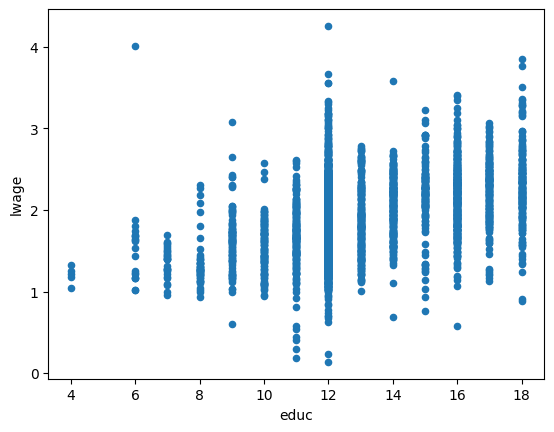

In [ ]:
df.plot.scatter("educ" , "lwage")

## OLS regression

In [ ]:
model = sm.OLS( df["lwage"] , df[ [  "const", "hours" , "age", "educ", "exper", "exper2", "tenure", "tenure2" ] ] )
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     199.7
Date:                Fri, 23 Jun 2023   Prob (F-statistic):          1.15e-250
Time:                        05:23:30   Log-Likelihood:                -1743.8
No. Observations:                3580   AIC:                             3504.
Df Residuals:                    3572   BIC:                             3553.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6547      0.092      7.090      0.0

## Convert ‘id’ colunm’s data type (from string) to categorical.

## Set two-dimensional index: (‘id','year').
Column of the first name in the index list (‘id’ in our example above) is the ‘entity’ (i.e., grouping) variable.

In [ ]:
# Convert ‘id’ colunm’s data type (from string) to categorical.
df[ 'id'] = pd.Categorical(df[ 'id'])
# Set two-dimensional index: (‘id','year'). Column of the first name in the index list (‘id’ in our example above) is the ‘entity’ (i.e., grouping) variable.
nlspd = df.set_index([ 'id','year'])
nlspd
# # If we want to slice nlspd conditional on year <= 2016, what should we do?
# # Challenge: nlspd[ : , ‘year’] column does not exist, as ‘year’ column is used as an (two-dimensional) index. What should we do?
# nlspd_to2016 = nlspd.loc[ nlspd.index.get_level_values(1) <= 2016,:]

const     lwage  hours  age  educ  collgrad  msp  nev_mar  not_smsa  \
id  year                                                                        
1   82      1.0  1.808289     38   30    12         0    1        0         0   
    83      1.0  1.863417     38   31    12         0    1        0         0   
    85      1.0  1.789367     38   33    12         0    0        0         0   
    87      1.0  1.846530     40   35    12         0    0        0         0   
    88      1.0  1.856449     40   37    12         0    0        0         0   
...         ...       ...    ...  ...   ...       ...  ...      ...       ...   
716 82      1.0  1.609438     40   36    12         0    1        0         1   
    83      1.0  1.459441     40   37    12         0    1        0         1   
    85      1.0  1.427116     40   39    12         0    1        0         1   
    87      1.0  1.494368     30   41    12         0    1        0         1   
    88      1.0  1.341422     40   42    12         0    1        0         1   

          c_city  south  black  union      exper     exper2    tenure  \
id  year                                                                
1   82         1      0      1      1   7.666667   58.77777  7.666667   
    83         1      0      1      1   8.583333   73.67361  8.583333   
    85         1      0      1      1  10.179490  103.62200  1.833333   
    87         1      0      1      1  12.179490  148.33990  3.750000   
    88         1      0      1      1  13.621790  185.55330  5.250000   
...          ...    ...    ...    ...        ...        ...       ...   
716 82         0      1      0      0  12.435900  154.65160  3.083333   
    83         0      1      0      0  13.435900  180.52330  4.083333   
    85         0      1      0      0  15.435900  238.26690  6.083333   
    87         0      1      0      0  17.435900  304.01050  8.166667   
    88         0      1      0      0  18.858970  355.66090  9.583333   

            tenure2    exper_sq  tenure_sq  exper_tenure  
id  year                                                  
1   82    58.777770   58.777783  58.777783     58.777783  
    83    73.673610   73.673605  73.673605     73.673605  
    85     3.361111  103.622017   3.361110     18.662395  
    87    14.062500  148.339977  14.062500     45.673088  
    88    27.562500  185.553163  27.562500     71.514398  
...             ...         ...        ...           ...  
716 82     9.506944  154.651609   9.506942     38.344021  
    83    16.673610  180.523409  16.673608     54.863254  
    85    37.006950  238.267009  37.006940     93.901720  
    87    66.694450  304.010609  66.694450    142.393189  
    88    91.840270  355.660749  91.840271    180.731790  

[3580 rows x 20 columns]

## Save the newly created data to a file.

In [ ]:
nlspd.to_csv("nlspd.csv")
nlspd.to_parquet("nlspd.parquet.gzip", compression='gzip')
nlspd.to_pickle("nlspd.pkl.zip", compression='zip')


## Read again the saved `nlspd` data files.

CSV file does not save the two-dimensional `index` structure.

`parquet` and  `pickle` files do save  the two-dimensional `index` structure.

In [ ]:
nlspd2 = pd.read_csv("nlspd.csv")
nlspd2

,id,year,const,lwage,hours,age,educ,collgrad,msp,nev_mar,...,south,black,union,exper,exper2,tenure,tenure2,exper_sq,tenure_sq,exper_tenure
0,1,82,1.0,1.808289,38,30,12,0,1,0,...,0,1,1,7.666667,58.77777,7.666667,58.777770,58.777783,58.777783,58.777783
1,1,83,1.0,1.863417,38,31,12,0,1,0,...,0,1,1,8.583333,73.67361,8.583333,73.673610,73.673605,73.673605,73.673605
2,1,85,1.0,1.789367,38,33,12,0,0,0,...,0,1,1,10.179490,103.62200,1.833333,3.361111,103.622017,3.361110,18.662395
3,1,87,1.0,1.846530,40,35,12,0,0,0,...,0,1,1,12.179490,148.33990,3.750000,14.062500,148.339977,14.062500,45.673088
4,1,88,1.0,1.856449,40,37,12,0,0,0,...,0,1,1,13.621790,185.55330,5.250000,27.562500,185.553163,27.562500,71.514398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,716,82,1.0,1.609438,40,36,12,0,1,0,...,1,0,0,12.435900,154.65160,3.083333,9.506944,154.651609,9.506942,38.344021
3576,716,83,1.0,1.459441,40,37,12,0,1,0,...,1,0,0,13.435900,180.52330,4.083333,16.673610,180.523409,16.673608,54.863254
3577,716,85,1.0,1.427116,40,39,12,0,1,0,...,1,0,0,15.435900,238.26690,6.083333,37.006950,238.267009,37.006940,93.901720
3578,716,87,1.0,1.494368,30,41,12,0,1,0,...,1,0,0,17.435900,304.01050,8.166667,66.694450,304.010609,66.694450,142.393189


In [ ]:
nlspd2 = pd.read_parquet("nlspd.parquet.gzip")
nlspd2

const     lwage  hours  age  educ  collgrad  msp  nev_mar  not_smsa  \
id  year                                                                        
1   82      1.0  1.808289     38   30    12         0    1        0         0   
    83      1.0  1.863417     38   31    12         0    1        0         0   
    85      1.0  1.789367     38   33    12         0    0        0         0   
    87      1.0  1.846530     40   35    12         0    0        0         0   
    88      1.0  1.856449     40   37    12         0    0        0         0   
...         ...       ...    ...  ...   ...       ...  ...      ...       ...   
716 82      1.0  1.609438     40   36    12         0    1        0         1   
    83      1.0  1.459441     40   37    12         0    1        0         1   
    85      1.0  1.427116     40   39    12         0    1        0         1   
    87      1.0  1.494368     30   41    12         0    1        0         1   
    88      1.0  1.341422     40   42    12         0    1        0         1   

          c_city  south  black  union      exper     exper2    tenure  \
id  year                                                                
1   82         1      0      1      1   7.666667   58.77777  7.666667   
    83         1      0      1      1   8.583333   73.67361  8.583333   
    85         1      0      1      1  10.179490  103.62200  1.833333   
    87         1      0      1      1  12.179490  148.33990  3.750000   
    88         1      0      1      1  13.621790  185.55330  5.250000   
...          ...    ...    ...    ...        ...        ...       ...   
716 82         0      1      0      0  12.435900  154.65160  3.083333   
    83         0      1      0      0  13.435900  180.52330  4.083333   
    85         0      1      0      0  15.435900  238.26690  6.083333   
    87         0      1      0      0  17.435900  304.01050  8.166667   
    88         0      1      0      0  18.858970  355.66090  9.583333   

            tenure2    exper_sq  tenure_sq  exper_tenure  
id  year                                                  
1   82    58.777770   58.777783  58.777783     58.777783  
    83    73.673610   73.673605  73.673605     73.673605  
    85     3.361111  103.622017   3.361110     18.662395  
    87    14.062500  148.339977  14.062500     45.673088  
    88    27.562500  185.553163  27.562500     71.514398  
...             ...         ...        ...           ...  
716 82     9.506944  154.651609   9.506942     38.344021  
    83    16.673610  180.523409  16.673608     54.863254  
    85    37.006950  238.267009  37.006940     93.901720  
    87    66.694450  304.010609  66.694450    142.393189  
    88    91.840270  355.660749  91.840271    180.731790  

[3580 rows x 20 columns]

In [ ]:
nlspd2 = pd.read_pickle("nlspd.pkl.zip" )
nlspd2

const     lwage  hours  age  educ  collgrad  msp  nev_mar  not_smsa  \
id  year                                                                        
1   82      1.0  1.808289     38   30    12         0    1        0         0   
    83      1.0  1.863417     38   31    12         0    1        0         0   
    85      1.0  1.789367     38   33    12         0    0        0         0   
    87      1.0  1.846530     40   35    12         0    0        0         0   
    88      1.0  1.856449     40   37    12         0    0        0         0   
...         ...       ...    ...  ...   ...       ...  ...      ...       ...   
716 82      1.0  1.609438     40   36    12         0    1        0         1   
    83      1.0  1.459441     40   37    12         0    1        0         1   
    85      1.0  1.427116     40   39    12         0    1        0         1   
    87      1.0  1.494368     30   41    12         0    1        0         1   
    88      1.0  1.341422     40   42    12         0    1        0         1   

          c_city  south  black  union      exper     exper2    tenure  \
id  year                                                                
1   82         1      0      1      1   7.666667   58.77777  7.666667   
    83         1      0      1      1   8.583333   73.67361  8.583333   
    85         1      0      1      1  10.179490  103.62200  1.833333   
    87         1      0      1      1  12.179490  148.33990  3.750000   
    88         1      0      1      1  13.621790  185.55330  5.250000   
...          ...    ...    ...    ...        ...        ...       ...   
716 82         0      1      0      0  12.435900  154.65160  3.083333   
    83         0      1      0      0  13.435900  180.52330  4.083333   
    85         0      1      0      0  15.435900  238.26690  6.083333   
    87         0      1      0      0  17.435900  304.01050  8.166667   
    88         0      1      0      0  18.858970  355.66090  9.583333   

            tenure2    exper_sq  tenure_sq  exper_tenure  
id  year                                                  
1   82    58.777770   58.777783  58.777783     58.777783  
    83    73.673610   73.673605  73.673605     73.673605  
    85     3.361111  103.622017   3.361110     18.662395  
    87    14.062500  148.339977  14.062500     45.673088  
    88    27.562500  185.553163  27.562500     71.514398  
...             ...         ...        ...           ...  
716 82     9.506944  154.651609   9.506942     38.344021  
    83    16.673610  180.523409  16.673608     54.863254  
    85    37.006950  238.267009  37.006940     93.901720  
    87    66.694450  304.010609  66.694450    142.393189  
    88    91.840270  355.660749  91.840271    180.731790  

[3580 rows x 20 columns]

## Summary statistics of the data

In [ ]:
nlspd2.describe

## Run a panel regression to estimate the fixed-effects model

We consider the fixed effects for `id` column and those for `year` column, respectively. The first column is for "entity" (i.e., crss-sectional variation unit) and the second one  for "time" (i.e., time-series variation).

-----------------------------------

<code>wage_within = PanelOLS(dependent= nlspd[  'lwage' ] ... )</code>

The code above constructs a panel regression model, of which reference is saved to a variable `wage_within`.

-----------------------------------

<code>wage_within.fit(cov_type='clustered', cluster_entity=True)</code>

The code above fits (i.e., estimates) the model to data, and displays the estimation results. In estimating the standard errors (`Std. Err.`), we specify the option of `cov_type='clustered', cluster_entity=True`: this code indicates that the error terms are clustered (serially correlated) for observatioin belonging to an "entity" group (here, the "entity" refers to the "id" column, i.e., the first column name 'id' specified in the code: <code>df.set_index([ 'id','year'])</code>.)

In [ ]:
# Run a panel regression to estimate the fixed-effects model
from linearmodels.panel import PanelOLS
wage_within = PanelOLS(dependent= nlspd[  'lwage' ], exog=nlspd[['const','exper', 'exper_sq', 'tenure', 'tenure_sq', 'south', 'union']],
                    entity_effects=True, time_effects=True)

# Estimation, with entity-level clustered covariance matrix: Results are displayed.
wage_within.fit(cov_type='clustered', cluster_entity=True)

Dep. Variable:,lwage,R-squared:,0.0267
Estimator:,PanelOLS,R-squared (Between):,0.0985
No. Observations:,3580,R-squared (Within):,0.0539
Date:,"Mon, May 01 2023",R-squared (Overall):,0.0911
Time:,04:18:20,Log-likelihood,1178.9
Cov. Estimator:,Clustered,,
,,F-statistic:,13.026
Entities:,716,P-value,0.0000
Avg Obs:,5.0000,Distribution:,"F(6,2854)"
Min Obs:,5.0000,,
Max Obs:,5.0000,F-statistic (robust):,5.8185
